<a href="https://colab.research.google.com/github/tanishayadav16/DL_exp3/blob/main/exp14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

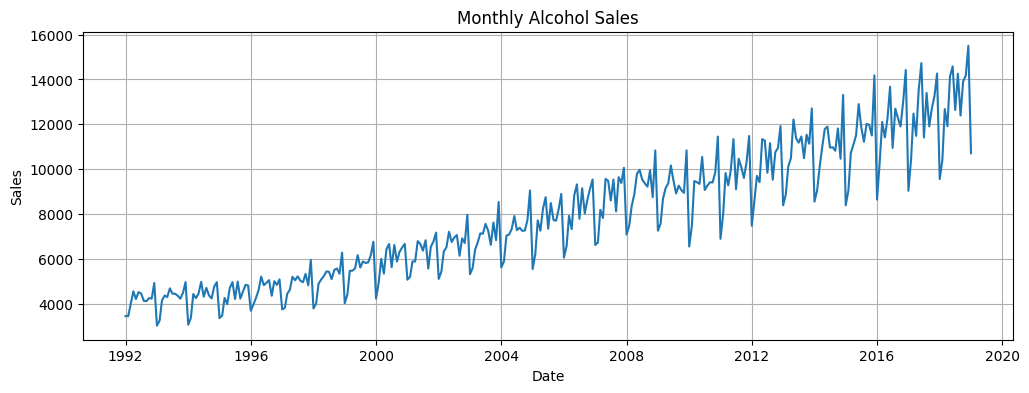

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0255 - val_loss: 0.0169
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 - val_loss: 0.0129
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - val_loss: 0.0124
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 0.0111
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - val_loss: 0.0138
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 0.0130
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0100
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 0.0132
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 0.0080
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - val_loss: 0.0107
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.7432e-04 - val_loss: 0.0059
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - val_loss: 

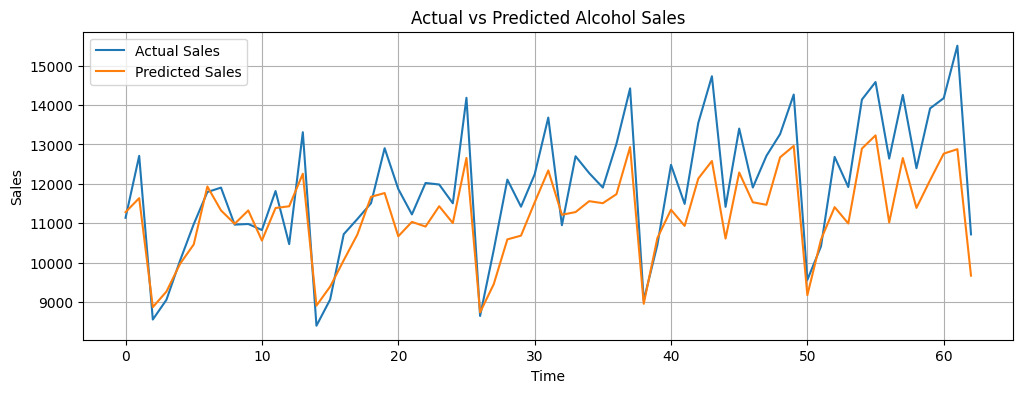

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Step 1: Load the dataset
df = pd.read_csv("Alcohol_Sales.csv")

# Rename columns for ease
df.columns = ['Month', 'Sales']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Step 2: Visualize the data
plt.figure(figsize=(12, 4))
plt.plot(df['Sales'])
plt.title('Monthly Alcohol Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Step 3: Normalize the sales data
scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(df[['Sales']])

# Step 4: Create sequences for time series prediction
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 12
X, y = create_sequences(scaled_sales, sequence_length)

# Step 5: Split the data
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Step 6: Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

# Step 8: Predict on test set
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Step 9: Plot actual vs predicted sales
plt.figure(figsize=(12, 4))
plt.plot(y_test_rescaled, label='Actual Sales')
plt.plot(predictions_rescaled, label='Predicted Sales')
plt.title('Actual vs Predicted Alcohol Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
